![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Clustering songs

## Introduction

Now it's time to cluster the songs of the **hot_songs** and **not_hot_songs** databases according to the song's audio features. For this purpose, you need to consider the following questions:

* Are you going to use all the audio features? If not, which ones do you think that makes more sense to be used?
* What is the optimal number of clusters (for methods that need to know this beforehand)?
* What is the best distance to use?
* What clustering method provides better results?
* Does the clustering method need a transformer?

## Considerations

Be aware that this process is extremely time-consuming!!! (it might take several hours in your laptop). Therefore, when testing different options, save the models into your disk in order to be able to use the best model later. Use pickle for this.  You don't want to retrain the best model again when you know what are the optimal parameters for each.
To determine which clustering method performs best, you need to be practical and think how many clusters you might want to have alongside with a [clustering metric](https://analyticsindiamag.com/a-tutorial-on-various-clustering-evaluation-metrics/) to evaluate how good or bad the songs were clustered.
If the number of clusters is small, each cluster will be too big and generic. On the other hand, if the number of clusters is too big then each cluster it will be too specific and it will be poorly populated (this it also depend on how heterogeneous is your dataset).

On the other hand, when you train your clustering model make sure to concatenate both databases together (ie: **hot_songs** and **not_hot_songs**) before. 
If you don't combine both datasets, the clusters obtained with the **hot_songs** will be different than the ones obtained with the **not_hot_songs**
database even though they might have the same label because they will contain different songs. However, after this you will not know to which original
dataframe belongs each song. To prevent this problem, you can add a new column named "dataset" with a "flag" to remind yourself in which dataset was included
each song. 

Finally, add new column to the full dataset **for each clustering method with the cluster membership of each song** 

/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

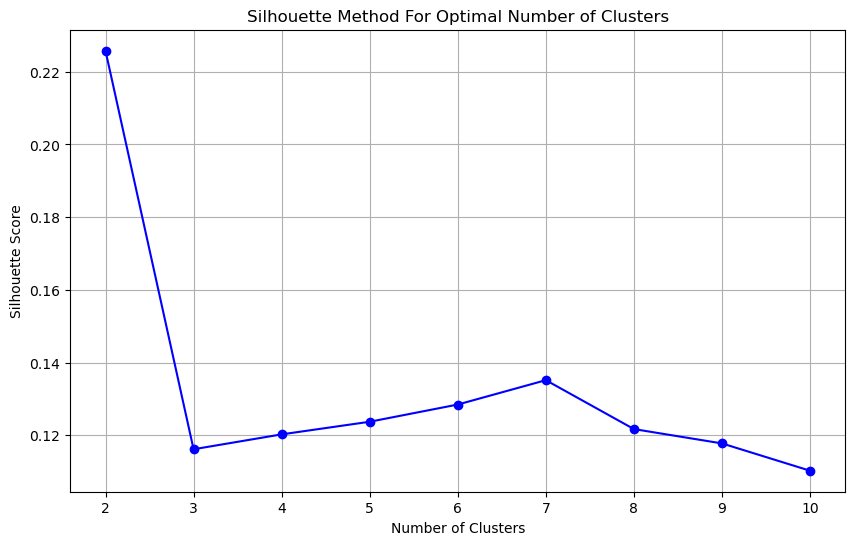

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('extended_songs.csv')

# Define the features to be normalized
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']

# Normalize the features
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Select the features for clustering
df_selected = df[features_to_normalize]

# Define the range of possible cluster numbers to try
cluster_numbers = range(2, 11)  # Start from 2 because silhouette_score requires at least 2 clusters

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Perform KMeans for each number of clusters, save the silhouette score
for k in cluster_numbers:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_selected)
    score = silhouette_score(df_selected, model.labels_, metric='euclidean')
    silhouette_scores.append(score)

# Plot the Silhouette Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()



In [2]:
# Based on the Silhouette Method graph, choose the optimal number of clusters
optimal_clusters = 7 # the number of clusters where the silhouette score is maximum

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
kmeans.fit(df_selected)

# Save the KMeans model
pickle.dump(kmeans, open("kmeans.pkl", "wb"))

# Add the KMeans cluster membership to the dataset
df['kmeans_cluster'] = kmeans.labels_

/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from sklearn.cluster import KMeans
import pickle

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(df_selected)

# Save the model
pickle.dump(kmeans, open("kmeans.pkl", "wb"))


/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(df_selected, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.135


In [5]:
# Add cluster membership to the dataset
df['kmeans_cluster'] = kmeans.labels_


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# Load the data
df = pd.read_csv('extended_songs.csv')

# Define the features to be normalized
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']

# Normalize the features
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

"""
# Select the features for clustering
df_selected = df[features_to_normalize]

# Apply KMeans clustering with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=1)
kmeans5.fit(df_selected)

# Save the KMeans model with 5 clusters
pickle.dump(kmeans5, open("kmeans5.pkl", "wb"))

# Calculate and print the Silhouette Score for 5 clusters
score5 = silhouette_score(df_selected, kmeans5.labels_, metric='euclidean')
print('Silhouette Score for 5 clusters: %.3f' % score5)

# Add the KMeans cluster membership with 5 clusters to the dataset
df['kmeans5_cluster'] = kmeans5.labels_
"""

# Apply KMeans clustering with 7 clusters
kmeans7 = KMeans(n_clusters=7, random_state=1)
kmeans7.fit(df_selected)

# Save the KMeans model with 7 clusters
pickle.dump(kmeans7, open("kmeans7.pkl", "wb"))

# Calculate and print the Silhouette Score for 7 clusters
score7 = silhouette_score(df_selected, kmeans7.labels_, metric='euclidean')
print('Silhouette Score for 7 clusters: %.3f' % score7)

# Add the KMeans cluster membership with 7 clusters to the dataset
df['kmeans7_cluster'] = kmeans7.labels_

# save the new dataset as extended_songs_clustered.csv
df.to_csv('extended_songs_clustered.csv', index=False)


/Users/maggiebreyer/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.135


In [7]:
df = pd.read_csv('extended_songs_clustered.csv')
df.head(1600)

,song,artist,source,id,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,kmeans7_cluster
0,Beggin',Måneskin,not_hot,3k79jB4aGmMDUQzEwa46Rz,-1.229373,-0.635646,-0.081578,0.249907,0.870237,-0.591783,...,-0.838861,0.498992,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,0.118492,0
1,STAY (with Justin Bieber),The Kid LAROI,not_hot,59uQI0PADDKeE6UZDTJEe8,-1.186799,0.252756,0.195820,0.396884,0.870237,-0.773082,...,0.031935,2.734069,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,0.118492,0
2,good 4 u,Olivia Rodrigo,not_hot,1Lo0QY9cvc8sUB2vnIOxDT,0.196844,-0.194552,0.750616,0.341008,0.870237,-0.857927,...,0.707246,-0.849414,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,0.118492,0
3,Bad Habits,Ed Sheeran,not_hot,1s7oOCT8vauUh01PbJD6ps,0.814162,1.041756,1.582810,0.472194,0.870237,-0.760579,...,1.333685,-0.544277,audio_features,1s7oOCT8vauUh01PbJD6ps,spotify:track:1s7oOCT8vauUh01PbJD6ps,https://api.spotify.com/v1/tracks/1s7oOCT8vauU...,https://api.spotify.com/v1/audio-analysis/1s7o...,239318,0.118492,0
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,not_hot,0yLdNVWF3Srea0uzk55zFn,0.161366,0.290031,-1.468567,0.824857,0.870237,-0.495328,...,0.600618,-0.172215,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,0.118492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Popular,"The Weeknd, Playboi Carti & Madonna",hot,6WzRpISELf3YglGAh7TXcG,1.211516,0.271393,-1.191169,0.034908,0.870237,0.596039,...,1.515841,-0.814378,audio_features,6WzRpISELf3YglGAh7TXcG,spotify:track:6WzRpISELf3YglGAh7TXcG,https://api.spotify.com/v1/tracks/6WzRpISELf3Y...,https://api.spotify.com/v1/audio-analysis/6WzR...,215467,0.118492,0
1596,Mourning,Post Malone,hot,0gWrMbx6pbdH3n3nsLjE55,-0.626246,0.103653,1.028014,0.711892,0.870237,-0.796303,...,-1.136531,-1.663034,audio_features,0gWrMbx6pbdH3n3nsLjE55,spotify:track:0gWrMbx6pbdH3n3nsLjE55,https://api.spotify.com/v1/tracks/0gWrMbx6pbdH...,https://api.spotify.com/v1/audio-analysis/0gWr...,147819,0.118492,0
1597,All Alone,Lil Uzi Vert,hot,6kHYpEnDpMCyGu0E2PlWY1,0.480668,0.364582,0.195820,0.111433,-1.149112,0.354903,...,-0.167993,0.508369,audio_features,6kHYpEnDpMCyGu0E2PlWY1,spotify:track:6kHYpEnDpMCyGu0E2PlWY1,https://api.spotify.com/v1/tracks/6kHYpEnDpMCy...,https://api.spotify.com/v1/audio-analysis/6kHY...,222618,0.118492,2
1598,Rubicon,Peso Pluma,hot,0xGZjxYqcNQ8WqxyeZ4eSN,0.523242,1.128732,-0.081578,-0.373226,0.870237,-0.729321,...,1.795740,0.571163,audio_features,0xGZjxYqcNQ8WqxyeZ4eSN,spotify:track:0xGZjxYqcNQ8WqxyeZ4eSN,https://api.spotify.com/v1/tracks/0xGZjxYqcNQ8...,https://api.spotify.com/v1/audio-analysis/0xGZ...,238447,-3.139029,0


### Now we can use the KMeans model to predict the cluster membership of new songs

In [8]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
import numpy as np
import pickle
from credentials import *

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the KMeans model
with open('kmeans7.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the song data
df = pd.read_csv('extended_songs_clustered.csv')

# Create Spotify object
credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

def search_song(title, artist, matches=10):
    """Search a song on Spotify and return its Spotify ID."""
    query = f'artist:{artist} track:{title}'
    song_ids = []
    song_titles = []
    song_artists = []
    try:
        results = sp.search(q=query, type='track', limit=matches)
        for i in range(matches):
            song_ids.append(results['tracks']['items'][i]['id'])
            song_titles.append(results['tracks']['items'][i]['name'])
            song_artists.append(results['tracks']['items'][i]['artists'][0]['name'])
    except:
        print("Song not found.")
        
    return list(zip(song_ids, song_titles, song_artists))

def recommend_songs():
    # Ask for user input
    title = input('Enter a song title: ')
    artist = input('Enter the song artist: ')
    
    # Search for the song on Spotify and get suggestions
    suggestions = search_song(title, artist)
    
    # Show the suggestions to the user
    print('\nWe found these songs:')
    for i, (id, title, artist) in enumerate(suggestions):
        print(f'{i+1}. {title} by {artist}')
    
    # Ask the user to confirm the correct song
    song_number = int(input('\nEnter the number of the correct song: ')) - 1
    song_id, title, artist = suggestions[song_number]
    
    # Fetch audio features for the selected song
    audio_features = sp.audio_features([song_id])[0]
    song_df = pd.DataFrame([audio_features])
    
    # Define the features the scaler was trained on
    features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']
    
    # Only keep columns that the scaler was trained on
    song_df = song_df[features]
    
    # check the DF for the right order
    #print(song_df)
    
    # Scale the audio features and predict the cluster
    song_df_scaled = scaler.transform(song_df)
    
    # Convert scaled array back to DataFrame and assign original feature names
    song_df_scaled = pd.DataFrame(song_df_scaled, columns=features)
    
    # Predict the cluster
    cluster = model.predict(song_df_scaled)[0]
    
    # Check if the song is in our data and is 'hot'
    song_in_data = df[(df['song'].str.lower() == title.lower()) & (df['artist'].str.lower() == artist.lower())]
    if not song_in_data.empty and song_in_data.iloc[0]['source'] == 'hot':
        # If the song is 'hot', recommend other 'hot' songs from the same cluster
        recommendations = df[(df['kmeans7_cluster'] == cluster) & (df['source'] == 'hot')]
        print('\nCongrats the Track is one of the HOOOOT 100 Songs, seems like you have a great music taste. Here are 5 more super Hot songs for you to fuck your eardrums with:')
    elif not song_in_data.empty:
        # If the song is not 'hot' but in our data, recommend other 'not hot' songs from the same cluster
        recommendations = df[(df['kmeans7_cluster'] == cluster) & (df['source'] == 'not_hot')]
        print('\nWell your Track of Choice is not suuuper Hot but at least hot enough to be in our not hot Database, which makes it somewhat HOT at least, as prize here are 5 more actually hot songs:')
    else:
        # If the song is not in our data, recommend 'not hot' songs from the same cluster
        print(f"Cluster: {cluster}")  # <-- Print the cluster variable
        #print(f"Unique clusters in df: {df['kmeans7_cluster'].unique()}")  # <-- Print unique clusters in df
        #print(f"Unique sources in df: {df['source'].unique()}")  # <-- Print unique sources in df
        recommendations = df[(df['kmeans7_cluster'] == cluster) & (df['source'] == 'not_hot')]
        #print(recommendations)
        print('\nSeems like your input is neither "hot" nor "not hot", I don\'t want to talk suss about your taste, but seems like it\'s a little off... anyway here you go 5 tracks you should listen to, maybe that will increase your musical taste:')
    
    # Select up to 5 recommendations
    recommendations = recommendations.sample(min(5, len(recommendations)))

    # Return the recommendations
    return (recommendations[['song', 'artist']]
        .reset_index(drop=True)
        .rename(columns={'song': 'Song', 'artist': 'Artist'})
        .rename(lambda x: x + 1))





In [9]:
recommend_songs()

Enter a song title: f u
Enter the song artist: miley cyrus
Song not found.

We found these songs:
1. Best of Both Worlds - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
2. Fucking Fucked Up by Miley Cyrus
3. See You Again - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
4. Start All Over - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
5. G.N.O. (Girl's Night Out) - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
6. Let's Dance - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
7. East Northumberland High - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus
8. Good and Broken - Live from Arrowhead Pond, Anaheim, U.S.A./2008 by Miley Cyrus

Enter the number of the correct song: 2
Cluster: 0

Seems like your input is neither "hot" nor "not hot", I don't want to talk suss about your taste, but seems like it's a little off... anyway here you go 5 tracks you should listen to, maybe that will increase your mu

,Song,Artist
1,Hands,Mac Miller
2,Cloud 9,Beach Bunny
3,We Are The People (feat. Bono & The Edge) - Of...,Martin Garrix
4,Better Now,Post Malone
5,Story of My Life,One Direction
